In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
bank_df = pd.read_csv('Churn_Modelling.csv')

In [4]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank_df.shape

(10000, 14)

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Check class distribution
print("\nChurn Distribution:")
print(bank_df['Exited'].value_counts())
print("\nPercentage:")
print(bank_df['Exited'].value_counts(normalize=True) * 100)


Churn Distribution:
Exited
0    7963
1    2037
Name: count, dtype: int64

Percentage:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


In [9]:
# Check for missing values
print("\nMissing Values:")
print(bank_df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
# Step 2: Distinguish features and target, split data
print("\n2. Distinguishing Features and Target...")


2. Distinguishing Features and Target...


In [11]:
# Drop unnecessary columns
print("Dropping unnecessary columns: RowNumber, CustomerId, Surname")
bank_df = bank_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


Dropping unnecessary columns: RowNumber, CustomerId, Surname


In [13]:
 #Display columns
print("\nFeatures in dataset:")
print(bank_df.columns.tolist())


Features in dataset:
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [14]:
# Encode categorical variables
print("\nEncoding categorical variables...")
le_geography = LabelEncoder()
le_gender = LabelEncoder()

bank_df['Geography'] = le_geography.fit_transform(bank_df['Geography'])
bank_df['Gender'] = le_gender.fit_transform(bank_df['Gender'])

print("Geography encoding:", dict(zip(le_geography.classes_, le_geography.transform(le_geography.classes_))))
print("Gender encoding:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))


Encoding categorical variables...
Geography encoding: {'France': 0, 'Germany': 1, 'Spain': 2}
Gender encoding: {'Female': 0, 'Male': 1}


In [16]:
# Separate features and target
X = bank_df.drop('Exited', axis=1)
y = bank_df['Exited']
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (10000, 10)
Target shape: (10000,)


In [17]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (8000, 10)
Testing set size: (2000, 10)


In [19]:
# Step 3: Normalize the data
print("\n3. Normalizing the Data...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3. Normalizing the Data...


In [20]:
print("Data normalization completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")


Data normalization completed!
Scaled training data shape: (8000, 10)


In [21]:
# Step 4: Initialize and build the Neural Network model
print("\n4. Building Neural Network Model (MLPClassifier)...")

# Create Neural Network with similar architecture
# hidden_layer_sizes=(64, 32, 16) means 3 hidden layers with 64, 32, and 16 neurons
model = MLPClassifier(
    hidden_layer_sizes=(64, 32, 16),
    activation='relu',
    solver='adam',
    max_iter=100,
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.2
)


4. Building Neural Network Model (MLPClassifier)...


In [22]:
print("\nModel Configuration:")
print(f"Hidden Layers: {model.hidden_layer_sizes}")
print(f"Activation: {model.activation}")
print(f"Solver: {model.solver}")
print(f"Max Iterations: {model.max_iter}")


Model Configuration:
Hidden Layers: (64, 32, 16)
Activation: relu
Solver: adam
Max Iterations: 100


In [23]:
# Train the model
print("\n5. Training the Neural Network Model...")
model.fit(X_train_scaled, y_train)


5. Training the Neural Network Model...
Iteration 1, loss = 0.52627680
Validation score: 0.796250
Iteration 2, loss = 0.46071936
Validation score: 0.795625
Iteration 3, loss = 0.43189233
Validation score: 0.813125
Iteration 4, loss = 0.41005210
Validation score: 0.831875
Iteration 5, loss = 0.38923558
Validation score: 0.850000
Iteration 6, loss = 0.37172445
Validation score: 0.853125
Iteration 7, loss = 0.35829198
Validation score: 0.846875
Iteration 8, loss = 0.34937714
Validation score: 0.845000
Iteration 9, loss = 0.34481962
Validation score: 0.851250
Iteration 10, loss = 0.33938912
Validation score: 0.848750
Iteration 11, loss = 0.33474896
Validation score: 0.848750
Iteration 12, loss = 0.33310619
Validation score: 0.848125
Iteration 13, loss = 0.33053424
Validation score: 0.852500
Iteration 14, loss = 0.32802961
Validation score: 0.853125
Iteration 15, loss = 0.32663422
Validation score: 0.852500
Iteration 16, loss = 0.32387334
Validation score: 0.855000
Iteration 17, loss = 0.3

MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32, 16),
              max_iter=100, random_state=42, validation_fraction=0.2,
              verbose=True)

In [24]:
# Step 5: Print accuracy score and confusion matrix
print("\n6. Model Evaluation...")

# Predict on test data
y_pred = model.predict(X_test_scaled)


6. Model Evaluation...


In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("MODEL PERFORMANCE:")
print(f"\nAccuracy Score: {accuracy:.4f} ({accuracy*100:.2f}%)")

MODEL PERFORMANCE:

Accuracy Score: 0.8580 (85.80%)


In [26]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned (0)', 'Churned (1)']))


Classification Report:
                 precision    recall  f1-score   support

Not Churned (0)       0.87      0.97      0.92      1593
    Churned (1)       0.77      0.43      0.55       407

       accuracy                           0.86      2000
      macro avg       0.82      0.70      0.73      2000
   weighted avg       0.85      0.86      0.84      2000



In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Not Churned correctly classified): {cm[0][0]}")
print(f"False Positives (Not Churned wrongly classified as Churned): {cm[0][1]}")
print(f"False Negatives (Churned wrongly classified as Not Churned): {cm[1][0]}")
print(f"True Positives (Churned correctly classified): {cm[1][1]}")


Confusion Matrix:
[[1542   51]
 [ 233  174]]

Confusion Matrix Interpretation:
True Negatives (Not Churned correctly classified): 1542
False Positives (Not Churned wrongly classified as Churned): 51
False Negatives (Churned wrongly classified as Not Churned): 233
True Positives (Churned correctly classified): 174


In [28]:
# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n" + "="*80)
print("ADDITIONAL METRICS:")
print("="*80)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


ADDITIONAL METRICS:
Precision: 0.7733
Recall: 0.4275
F1-Score: 0.5506


Text(0.5, 25.722222222222214, 'Predicted')

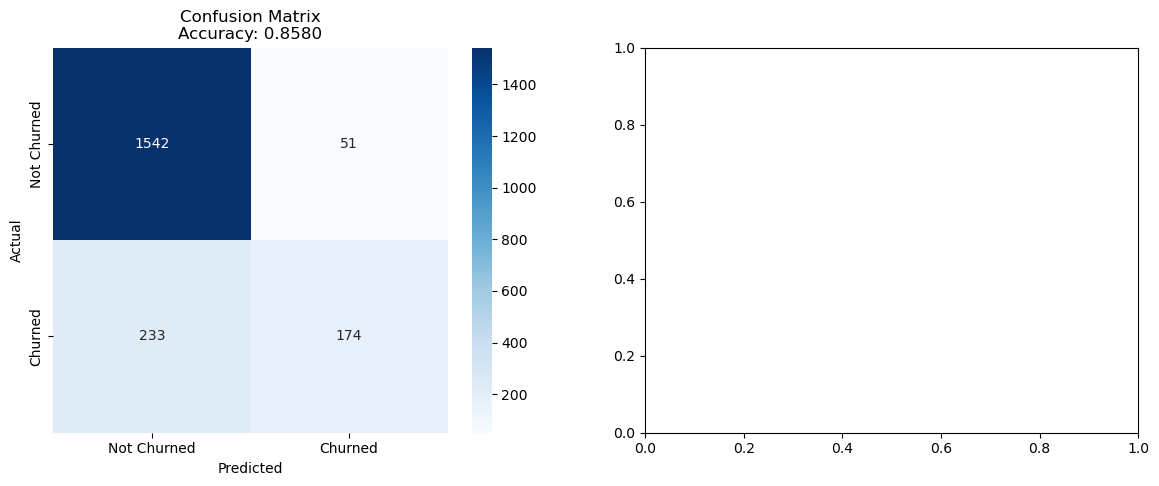

In [31]:
# Visualize Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
axes[0].set_title(f'Confusion Matrix\nAccuracy: {accuracy:.4f}')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

In [ ]:
# Part A — Basics & Theory (simple)
# From the file names and code structure, this notebook is a classic email classification problem (likely spam vs ham). It follows a standard supervised classification ML workflow using text data. Here are the basics and theory:

# 1. Problem type
# Supervised learning — Classification: The task is to classify an email as spam or not spam (ham) using the email text and possibly other metadata.

# 2. Key steps and why they matter
# Load data: Read emails dataset (CSV).

# Inspect & clean: Check data types, missing values, and remove irrelevant columns (like an email ID).

# Text preprocessing and feature extraction:

# Convert raw email text into numerical features the ML models can use (commonly via CountVectorizer or TfidfVectorizer).

# Basic text cleaning may include lowercasing, removing punctuation, stopwords, tokenization, stemming/lemmatization (some steps might be present or omitted).

# Split data: Use train_test_split to create training and testing sets so model evaluation is fair.

# Train models: Train classification algorithms (common choices: Logistic Regression, Naive Bayes, SVM, Random Forest, etc.).

# Evaluate models:

# Use metrics like accuracy, precision, recall, F1-score, and confusion matrix for classification tasks.

# For imbalanced datasets (spam often less frequent than ham), precision/recall and F1 are more informative than plain accuracy.

# Compare models: Choose the best-performing model based on metrics and possibly speed/interpretability.

# 3. Why certain choices are popular here
# Text vectorizers (Count/Tfidf): Convert text to numeric matrices; Tfidf often works better by down-weighting common words.

# Multinomial Naive Bayes: Fast and effective baseline for text classification due to word frequency modeling.

# Logistic Regression / SVM: Strong linear classifiers after vectorization.

# Random Forest: Can be used, though tree-based models sometimes need more careful handling for sparse high-dimensional text data.

# 4. Important evaluation concepts
# Confusion matrix: Shows True Positives, False Positives, True Negatives, False Negatives.

# Precision = TP / (TP + FP) — of all predicted spam, how many were actually spam.

# Recall (Sensitivity) = TP / (TP + FN) — of all real spam emails, how many did we detect.

# F1-score = harmonic mean of precision and recall — balances the two.

# Part B — Line-by-line explanation of key code sections
# Below I cover the core parts of the notebook. I’ll quote relevant code blocks (trimmed where necessary) and explain each line or small group of lines.

# Code cell: imports & reading data
# python
# Copy code
# import pandas as pd
# df = pd.read_csv('emails.csv')
# Explanation:

# import pandas as pd — import pandas for data manipulation.

# df = pd.read_csv('emails.csv') — load the CSV file into a DataFrame df.

# Code cell: quick inspection
# python
# Copy code
# df.info()
# df.head()
# df.dtypes
# df.describe()
# Explanation:

# df.info() — prints column names, counts, and data types.

# df.head() — displays first few rows to see sample content (helpful to confirm column containing email text and labels).

# df.dtypes — shows types of each column.

# df.describe() — summary statistics for numerical columns.

# Code cell: dropping ID and checking nulls
# python
# Copy code
# df.drop(columns=['Email No.'], inplace=True)
# df.isna().sum()
# Explanation:

# df.drop(..., inplace=True) — removes column Email No. because ID is not useful for prediction.

# df.isna().sum() — counts missing values per column; ensures no nulls in critical columns like email text or label.

# Code cell: separating features and labels
# python
# Copy code
# # Separating the features and the labels
# X = df['text']   # or the column that contains email content
# y = df['label']  # e.g., 'spam' or 'ham' (may be 1/0)
# Explanation:

# X holds the raw email text (features).

# y holds labels (what we want to predict).

# Code cell: train-test split
# python
# Copy code
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Explanation:

# train_test_split splits dataset into 80% training and 20% testing. random_state ensures reproducible splits.

# Code cell: Vectorization (example — could be CountVectorizer or Tfidf)
# python
# Copy code
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# Line-by-line:

# Import TfidfVectorizer — converts text to TF-IDF weighted numeric matrix.

# TfidfVectorizer(stop_words='english', max_df=0.7):

# stop_words='english' removes common English stopwords (like 'the', 'and').

# max_df=0.7 ignores terms that appear in more than 70% of documents (very common words).

# fit_transform(X_train) learns vocabulary from training data and transforms it to matrix.

# transform(X_test) transforms test data using the same vocabulary (do not fit on test).

# Why TF-IDF? It gives more importance to words that are important in a document but not common across all documents.

# Code cell: Define models
# python
# Copy code
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier

# models = {
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "Naive Bayes": MultinomialNB(),
#     "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
# }
# Explanation:

# Import three classifiers:

# LogisticRegression: linear classifier; max_iter=1000 to ensure convergence.

# MultinomialNB: Naive Bayes suited for count/frequency features (good for text).

# RandomForestClassifier: ensemble of trees.

# models dict holds instantiated models for easy iteration.

# Code cell: Train and evaluate each model
# python
# Copy code
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for model_name, model in models.items():
#     model.fit(X_train_vec, y_train)
#     y_pred = model.predict(X_test_vec)
#     acc = accuracy_score(y_test, y_pred)
#     print(model_name, "Accuracy:", acc)
#     print(classification_report(y_test, y_pred))
#     print(confusion_matrix(y_test, y_pred))
# Line-by-line:

# Import evaluation metrics.

# Loop over each model:

# model.fit(...) — train model on vectorized training data.

# model.predict(...) — predict labels for test set.

# accuracy_score — compute accuracy.

# classification_report — prints precision, recall, f1-score for each class (spam/ham).

# confusion_matrix — prints TP/FP/FN/TN counts.

# Why multiple metrics? Accuracy can be misleading for unbalanced datasets; classification report gives deeper insight (precision/recall).

# Code cell: Final comparison / pick best model
# python
# Copy code
# # Each model is trained using the train set and predictions are made on the test set.
# # Accuracy scores are calculated for each model.
# # Based on the accuracy and classification report, choose the best model.
# Explanation: This cell likely contains comments and maybe a small summary. Choose best model based on F1 or recall for spam class if spam detection is important.

# Quick tips & common pitfalls (from practice)
# Never fit vectorizer on test data — always fit on training only. The notebook uses fit_transform on train and transform on test (correct).

# Handle class imbalance — if spam is rare, consider class_weight='balanced' in classifiers or use resampling (SMOTE/undersampling).

# Model choice — MultinomialNB is often a strong baseline for email spam detection. LogisticRegression also works well with TF-IDF.

# Text cleaning — simple lowercasing and removing punctuation usually helps. More advanced cleaning (stemming/lemmatization) may or may not help.

# Hyperparameter tuning — use GridSearchCV or RandomizedSearchCV to tune C for LogisticRegression or alpha for Naive Bayes and n_estimators/max_depth for RandomForest.